<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
# Загрузка данных из файла
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'
data = pd.read_csv(file_path)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
# Вывод первых пяти строк таблицы
print(data.head())

# Вывод последних пяти строк таблицы
print(data.tail())


                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [7]:
# Вывод основной информации о таблице
print(data.info())

# Счетчик пропущенных значений по столбцам
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Образование и ВУЗ                44744 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Опыт работы (в месяцах)          44744 non-null  int64 
dtypes: int64(1), object(11)
memory u

4. Обратите внимание на информацию о числе непустых значений.

5. Выведите основную статистическую информацию о столбцах.


In [9]:
# Основная статистическая информация о числовых столбцах
print(data.describe())


       Опыт работы (в месяцах)
count             44744.000000
mean                281.760504
std                2414.253692
min                   0.000000
25%                  16.000000
50%                  27.000000
75%                  43.000000
max               24262.000000


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [11]:
import pandas as pd
import re

# Загрузка данных из файла
file_path = 'dst-3.0_16_1_hh_database_modified.csv'
data = pd.read_csv(file_path)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Проверка уникальных значений в новом столбце "Образование"
print(data['Образование'].unique())

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Сохранение изменений
data.to_csv('dst-3.0_16_1_hh_database_modified.csv', index=False)


['высшее' 'среднее специальное' 'среднее']


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [15]:
import pandas as pd
import re
import os

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else 0)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [17]:
import pandas as pd
import re
import os

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [19]:
import pandas as pd
import re
import os

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_city_and_relocation(info_str):
    city, relocation, business_trips = None, False, False
    try:
        parts = info_str.split(',')
        city = parts[0].strip()
        # Определение категории города
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'

        # Готовность к переезду
        relocation = any(keyword in info_str.lower() for keyword in ['готов к переезду', 'хочу переехать'])

        # Готовность к командировкам
        if 'готов к командировкам' in info_str.lower():
            business_trips = True
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return city_category, relocation, business_trips

# Применение функции для извлечения города, готовности к переезду и командировкам
data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_and_relocation(x)))

# Удаление столбца "Город, переезд, командировки"
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [21]:
import pandas as pd
import re
import os

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_city_and_relocation(info_str):
    city, relocation, business_trips = None, False, False
    try:
        parts = info_str.split(',')
        city = parts[0].strip()
        # Определение категории города
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'

        # Готовность к переезду
        relocation = any(keyword in info_str.lower() for keyword in ['готов к переезду', 'хочу переехать'])

        # Готовность к командировкам
        if 'готов к командировкам' in info_str.lower():
            business_trips = True
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return city_category, relocation, business_trips

# Применение функции для извлечения города, готовности к переезду и командировкам
data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_and_relocation(x)))

# Удаление столбца "Город, переезд, командировки"
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# One Hot Encoding для признаков "Занятость" и "График"
employment_types = ["полная занятость", "частичная занятость", "проектная работа", "стажировка", "волонтерство"]
for emp_type in employment_types:
    data[emp_type] = data['Занятость'].apply(lambda x: emp_type in str(x).lower() if pd.notna(x) else False)

graph_types = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
for graph_type in graph_types:
    data[graph_type] = data['График'].apply(lambda x: graph_type in str(x).lower() if pd.notna(x) else False)

# Удаление столбцов "Занятость" и "График"
data.drop(columns=['Занятость', 'График'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [27]:
import pandas as pd
import re
import os

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_city_and_relocation(info_str):
    city, relocation, business_trips = None, False, False
    try:
        parts = info_str.split(',')
        city = parts[0].strip()
        # Определение категории города
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'

        # Готовность к переезду
        relocation = any(keyword in info_str.lower() for keyword in ['готов к переезду', 'хочу переехать'])

        # Готовность к командировкам
        if 'готов к командировкам' in info_str.lower():
            business_trips = True
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return city_category, relocation, business_trips

# Применение функции для извлечения города, готовности к переезду и командировкам
data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_and_relocation(x)))

# Удаление столбца "Город, переезд, командировки"
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# One Hot Encoding для признаков "Занятость" и "График"
employment_types = ["полная занятость", "частичная занятость", "проектная работа", "стажировка", "волонтерство"]
for emp_type in employment_types:
    data[emp_type] = data['Занятость'].apply(lambda x: emp_type in str(x).lower() if pd.notna(x) else False)

graph_types = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
for graph_type in graph_types:
    data[graph_type] = data['График'].apply(lambda x: graph_type in str(x).lower() if pd.notna(x) else False)

# Удаление столбцов "Занятость" и "График"
data.drop(columns=['Занятость', 'График'], inplace=True)

# Преобразование столбца "Обновление резюме" в формат datetime и выделение даты
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

# Извлечение суммы и валюты из столбца "ЗП"
def extract_salary_info(salary_str):
    if pd.isna(salary_str):
        return None, None
    match = re.search(r'(\d+)\s*(\w+)', salary_str)
    if match:
        amount = int(match.group(1))
        currency = match.group(2).lower()
        return amount, currency
    return None, None

# Применение функции для извлечения суммы и валюты
data[['Сумма ЗП', 'Валюта']] = data['ЗП'].apply(lambda x: pd.Series(extract_salary_info(x)))

# Сопоставление валюты с ISO кодами
currency_mapping = {
    'грн': 'UAH',
    'usd': 'USD',
    'eur': 'EUR',
    'белруб': 'BYN',
    'kgs': 'KGS',
    'сум': 'UZS',
    'azn': 'AZN',
    'kzt': 'KZT',
    'руб': 'RUB'
}
data['Валюта'] = data['Валюта'].map(currency_mapping)

# Установленные пропорции для каждой валюты
exchange_rates_proportion = {
    'UAH': 10,
    'USD': 1,
    'EUR': 1,
    'BYN': 1,
    'KGS': 10,
    'UZS': 10000,
    'AZN': 1,
    'KZT': 100,
    'RUB': 1
}

# Установленные курсы для каждой валюты (примерные)
exchange_rates_close = {
    'UAH': 2.7,
    'USD': 74,
    'EUR': 88,
    'BYN': 29,
    'KGS': 0.85,
    'UZS': 0.0067,
    'AZN': 43,
    'KZT': 0.17,
    'RUB': 1
}

# Вычисление заработной платы в рублях
# Учитываем пропорцию и курс
data['proportion'] = data['Валюта'].map(exchange_rates_proportion)
data['close'] = data['Валюта'].map(exchange_rates_close)
data['ЗП (руб)'] = (data['Сумма ЗП'] * data['close']) / data['proportion']

# Удаление промежуточных столбцов
data.drop(columns=['ЗП', 'Сумма ЗП', 'Валюта', 'proportion', 'close'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


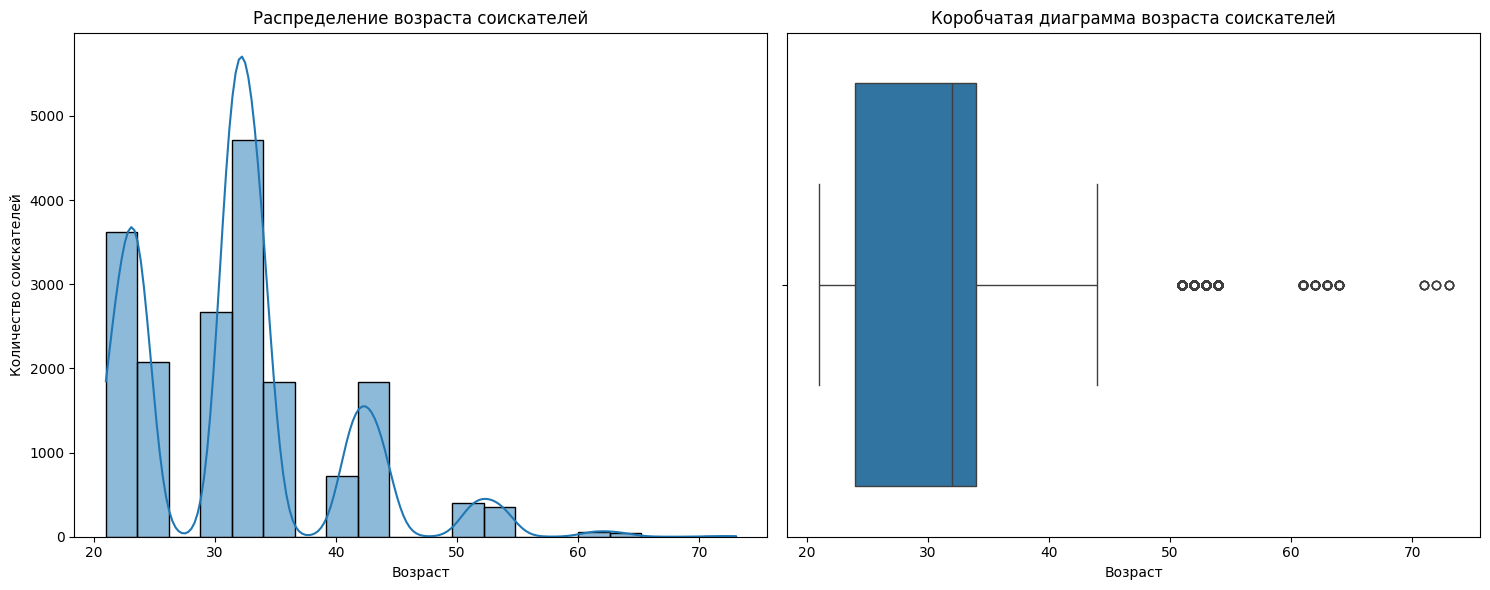

In [29]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_city_and_relocation(info_str):
    city, relocation, business_trips = None, False, False
    try:
        parts = info_str.split(',')
        city = parts[0].strip()
        # Определение категории города
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'

        # Готовность к переезду
        relocation = any(keyword in info_str.lower() for keyword in ['готов к переезду', 'хочу переехать'])

        # Готовность к командировкам
        if 'готов к командировкам' in info_str.lower():
            business_trips = True
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return city_category, relocation, business_trips

# Применение функции для извлечения города, готовности к переезду и командировкам
data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_and_relocation(x)))

# Удаление столбца "Город, переезд, командировки"
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# One Hot Encoding для признаков "Занятость" и "График"
employment_types = ["полная занятость", "частичная занятость", "проектная работа", "стажировка", "волонтерство"]
for emp_type in employment_types:
    data[emp_type] = data['Занятость'].apply(lambda x: emp_type in str(x).lower() if pd.notna(x) else False)

graph_types = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
for graph_type in graph_types:
    data[graph_type] = data['График'].apply(lambda x: graph_type in str(x).lower() if pd.notna(x) else False)

# Удаление столбцов "Занятость" и "График"
data.drop(columns=['Занятость', 'График'], inplace=True)

# Преобразование столбца "Обновление резюме" в формат datetime и выделение даты
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

# Извлечение суммы и валюты из столбца "ЗП"
def extract_salary_info(salary_str):
    if pd.isna(salary_str):
        return None, None
    match = re.search(r'(\d+)\s*(\w+)', salary_str)
    if match:
        amount = int(match.group(1))
        currency = match.group(2).lower()
        return amount, currency
    return None, None

# Применение функции для извлечения суммы и валюты
data[['Сумма ЗП', 'Валюта']] = data['ЗП'].apply(lambda x: pd.Series(extract_salary_info(x)))

# Сопоставление валюты с ISO кодами
currency_mapping = {
    'грн': 'UAH',
    'usd': 'USD',
    'eur': 'EUR',
    'белруб': 'BYN',
    'kgs': 'KGS',
    'сум': 'UZS',
    'azn': 'AZN',
    'kzt': 'KZT',
    'руб': 'RUB'
}
data['Валюта'] = data['Валюта'].map(currency_mapping)

# Установленные пропорции для каждой валюты
exchange_rates_proportion = {
    'UAH': 10,
    'USD': 1,
    'EUR': 1,
    'BYN': 1,
    'KGS': 10,
    'UZS': 10000,
    'AZN': 1,
    'KZT': 100,
    'RUB': 1
}

# Установленные курсы для каждой валюты (примерные)
exchange_rates_close = {
    'UAH': 2.7,
    'USD': 74,
    'EUR': 88,
    'BYN': 29,
    'KGS': 0.85,
    'UZS': 0.0067,
    'AZN': 43,
    'KZT': 0.17,
    'RUB': 1
}

# Вычисление заработной платы в рублях
# Учитываем пропорцию и курс
data['proportion'] = data['Валюта'].map(exchange_rates_proportion)
data['close'] = data['Валюта'].map(exchange_rates_close)
data['ЗП (руб)'] = (data['Сумма ЗП'] * data['close']) / data['proportion']

# Удаление промежуточных столбцов
data.drop(columns=['ЗП', 'Сумма ЗП', 'Валюта', 'proportion', 'close'], inplace=True)

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")

# Построение гистограммы и коробчатой диаграммы для признака "Возраст"
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Возраст'], bins=20, kde=True)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Количество соискателей')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Возраст'])
plt.title('Коробчатая диаграмма возраста соискателей')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()


"""
### Выводы по графику возраста соискателей:

- Гистограмма показывает, что большинство соискателей находятся в возрастной категории от 25 до 35 лет, что видно по высокому пику в этом интервале.
- Мода распределения составляет примерно 30 лет, что свидетельствует о том, что именно этот возраст встречается чаще всего.
- Коробчатая диаграмма показывает, что основной интервал возрастов варьируется от 20 до 40 лет, при этом наблюдаются выбросы в диапазоне от 50 лет и старше.
- Это означает, что большинство соискателей — люди в возрасте от 20 до 40 лет, но есть несколько более возрастных кандидатов, которые можно считать аномальными значениями.
"""
.
"""


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

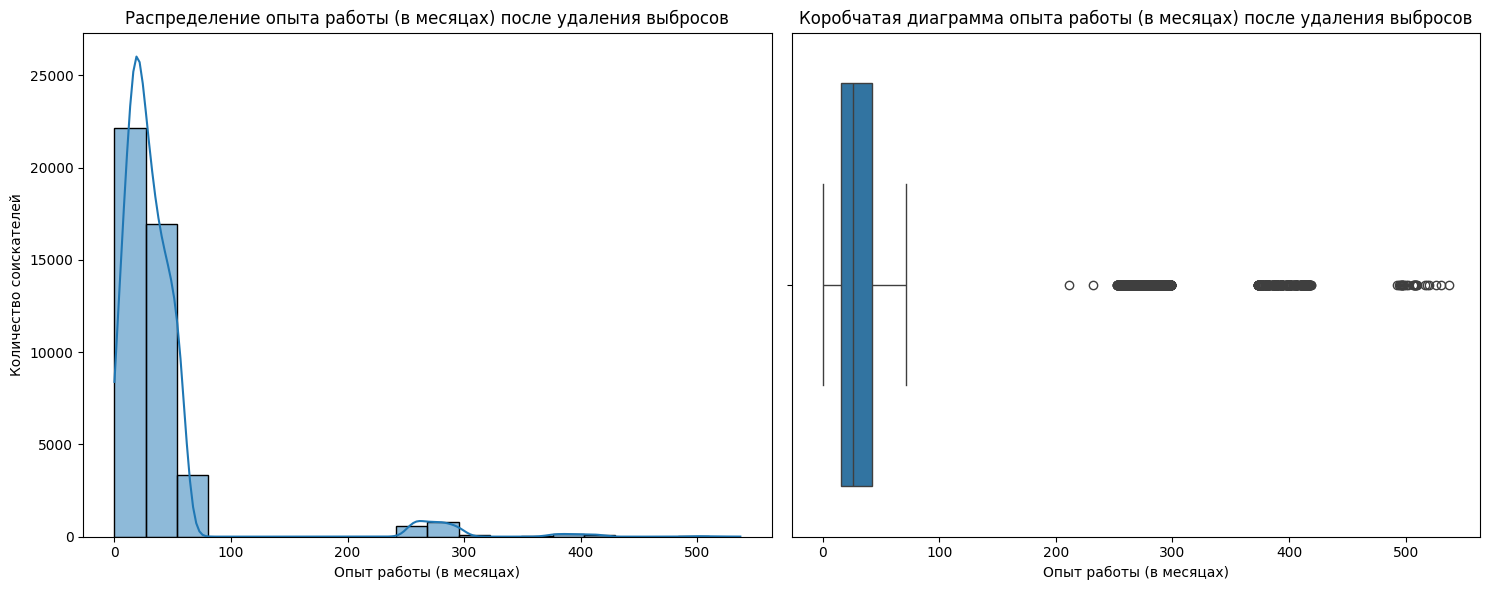

Мода опыта работы: 20.0 месяцев
Минимальное значение опыта работы: 0.0 месяцев
Максимальное значение опыта работы: 537.0 месяцев
Медиана опыта работы: 26.0 месяцев
Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [3]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Путь к вашему файлу CSV
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database.csv'

# Проверка существования файла
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

# Загрузка данных из файла CSV с указанием разделителя и игнорированием ошибочных строк
data = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')

# Функция для преобразования строки опыта работы в количество месяцев
def convert_experience_to_months(experience_str):
    if pd.isna(experience_str) or experience_str.lower() in ["не указано", ""]:
        return None
    
    years = 0
    months = 0

    # Извлечение количества лет
    years_match = re.search(r'(\d+)\s*год', experience_str)
    if years_match:
        years = int(years_match.group(1))

    # Извлечение количества месяцев
    months_match = re.search(r'(\d+)\s*месяц', experience_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы" для получения количества месяцев
data['Опыт работы (в месяцах)'] = data['Опыт работы'].apply(lambda x: convert_experience_to_months(str(x)) if pd.notna(x) else None)

# Удаление столбца "Опыт работы"
data.drop(columns=['Опыт работы'], inplace=True)

# Функция для извлечения уровня образования
def extract_education_level(education_str):
    if pd.isna(education_str):
        return None
    education_str = education_str.lower()
    if 'высшее' in education_str:
        return 'высшее'
    elif 'неоконченное высшее' in education_str:
        return 'неоконченное высшее'
    elif 'среднее специальное' in education_str:
        return 'среднее специальное'
    elif 'среднее' in education_str:
        return 'среднее'
    else:
        return None

# Применение функции к столбцу "Образование и ВУЗ" для получения уровня образования
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: extract_education_level(x))

# Удаление столбца "Образование и ВУЗ"
data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Функция для извлечения пола и возраста
def extract_gender_and_age(info_str):
    gender, age = None, None
    try:
        parts = info_str.split(',')
        gender = 'М' if 'мужчина' in parts[0].strip().lower() else 'Ж'
        age_match = re.search(r'(\d+)\s*год', parts[1].strip())
        if age_match:
            age = int(age_match.group(1))
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return gender, age

# Применение функции для извлечения пола и возраста
data[['Пол', 'Возраст']] = data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаление столбца "Пол, возраст"
data.drop(columns=['Пол, возраст'], inplace=True)

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_city_and_relocation(info_str):
    city, relocation, business_trips = None, False, False
    try:
        parts = info_str.split(',')
        city = parts[0].strip()
        # Определение категории города
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'

        # Готовность к переезду
        relocation = any(keyword in info_str.lower() for keyword in ['готов к переезду', 'хочу переехать'])

        # Готовность к командировкам
        if 'готов к командировкам' in info_str.lower():
            business_trips = True
    except Exception as e:
        print(f"Ошибка при обработке строки: {info_str}, ошибка: {e}")
    return city_category, relocation, business_trips

# Применение функции для извлечения города, готовности к переезду и командировкам
data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_city_and_relocation(x)))

# Удаление столбца "Город, переезд, командировки"
data.drop(columns=['Город, переезд, командировки'], inplace=True)

# One Hot Encoding для признаков "Занятость" и "График"
employment_types = ["полная занятость", "частичная занятость", "проектная работа", "стажировка", "волонтерство"]
for emp_type in employment_types:
    data[emp_type] = data['Занятость'].apply(lambda x: emp_type in str(x).lower() if pd.notna(x) else False)

graph_types = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
for graph_type in graph_types:
    data[graph_type] = data['График'].apply(lambda x: graph_type in str(x).lower() if pd.notna(x) else False)

# Удаление столбцов "Занятость" и "График"
data.drop(columns=['Занятость', 'График'], inplace=True)

# Преобразование столбца "Обновление резюме" в формат datetime и выделение даты
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

# Извлечение суммы и валюты из столбца "ЗП"
def extract_salary_info(salary_str):
    if pd.isna(salary_str):
        return None, None
    match = re.search(r'(\d+)\s*(\w+)', salary_str)
    if match:
        amount = int(match.group(1))
        currency = match.group(2).lower()
        return amount, currency
    return None, None

# Применение функции для извлечения суммы и валюты
data[['Сумма ЗП', 'Валюта']] = data['ЗП'].apply(lambda x: pd.Series(extract_salary_info(x)))

# Сопоставление валюты с ISO кодами
currency_mapping = {
    'грн': 'UAH',
    'usd': 'USD',
    'eur': 'EUR',
    'белруб': 'BYN',
    'kgs': 'KGS',
    'сум': 'UZS',
    'azn': 'AZN',
    'kzt': 'KZT',
    'руб': 'RUB'
}
data['Валюта'] = data['Валюта'].map(currency_mapping)

# Установленные пропорции для каждой валюты
exchange_rates_proportion = {
    'UAH': 10,
    'USD': 1,
    'EUR': 1,
    'BYN': 1,
    'KGS': 10,
    'UZS': 10000,
    'AZN': 1,
    'KZT': 100,
    'RUB': 1
}

# Установленные курсы для каждой валюты (примерные)
exchange_rates_close = {
    'UAH': 2.7,
    'USD': 74,
    'EUR': 88,
    'BYN': 29,
    'KGS': 0.85,
    'UZS': 0.0067,
    'AZN': 43,
    'KZT': 0.17,
    'RUB': 1
}

# Вычисление заработной платы в рублях
# Учитываем пропорцию и курс
data['proportion'] = data['Валюта'].map(exchange_rates_proportion)
data['close'] = data['Валюта'].map(exchange_rates_close)
data['ЗП (руб)'] = (data['Сумма ЗП'] * data['close']) / data['proportion']

# Удаление промежуточных столбцов
data.drop(columns=['ЗП', 'Сумма ЗП', 'Валюта', 'proportion', 'close'], inplace=True)

# Удаление аномальных значений опыта работы (предположим, что значения более 600 месяцев являются аномальными)
data_cleaned = data[data['Опыт работы (в месяцах)'] <= 600]

# Построение гистограммы и коробчатой диаграммы для признака "Опыт работы (в месяцах)" после удаления выбросов
plt.figure(figsize=(15, 6))

# Гистограмма распределения опыта работы после удаления выбросов
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Опыт работы (в месяцах)'], bins=20, kde=True)
plt.title('Распределение опыта работы (в месяцах) после удаления выбросов')
plt.xlabel('Опыт работы (в месяцах)')
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма опыта работы после удаления выбросов
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['Опыт работы (в месяцах)'])
plt.title('Коробчатая диаграмма опыта работы (в месяцах) после удаления выбросов')
plt.xlabel('Опыт работы (в месяцах)')

plt.tight_layout()
plt.show()

# Вычисление основных характеристик распределения после удаления выбросов
mode_experience = data_cleaned['Опыт работы (в месяцах)'].mode()[0]
min_experience = data_cleaned['Опыт работы (в месяцах)'].min()
max_experience = data_cleaned['Опыт работы (в месяцах)'].max()
median_experience = data_cleaned['Опыт работы (в месяцах)'].median()

# Вывод основных характеристик распределения
print(f"Мода опыта работы: {mode_experience} месяцев")
print(f"Минимальное значение опыта работы: {min_experience} месяцев")
print(f"Максимальное значение опыта работы: {max_experience} месяцев")
print(f"Медиана опыта работы: {median_experience} месяцев")

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")




### Описание распределения признака "Опыт работы" после удаления выбросов

1. **Мода распределения**:
   - Мода опыта работы составляет **20 месяцев**. Это значит, что наиболее часто встречаемое значение опыта среди соискателей — 20 месяцев.

2. **Предельные значения признака**:
   - **Минимальное значение** — **0 месяцев** (есть соискатели без опыта работы).
   - **Максимальное значение** — **537 месяцев**, что составляет более 44 лет. Это значение выглядит необычно и, вероятно, является выбросом.

3. **Интервал, в котором находится опыт работы большинства соискателей**:
   - Большинство соискателей имеют опыт работы **в интервале от 0 до 50 месяцев**. Основная масса значений сосредоточена в этом диапазоне, что видно по пику на гистограмме, а также подтверждается медианой (26 месяцев).

4. **Аномалии в признаке опыта работы**:
   - Наблюдаются явные **аномалии** — значительные выбросы, превышающие 100 месяцев. Опыт работы **более 100 месяцев** можно считать аномальным, так как такие значения встречаются редко и выходят далеко за пределы основного распределения. Максимальное значение (537 месяцев) — явный выброс, который искажает общую картину данных и нуждается в особом рассмотрении или фильтрации.


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


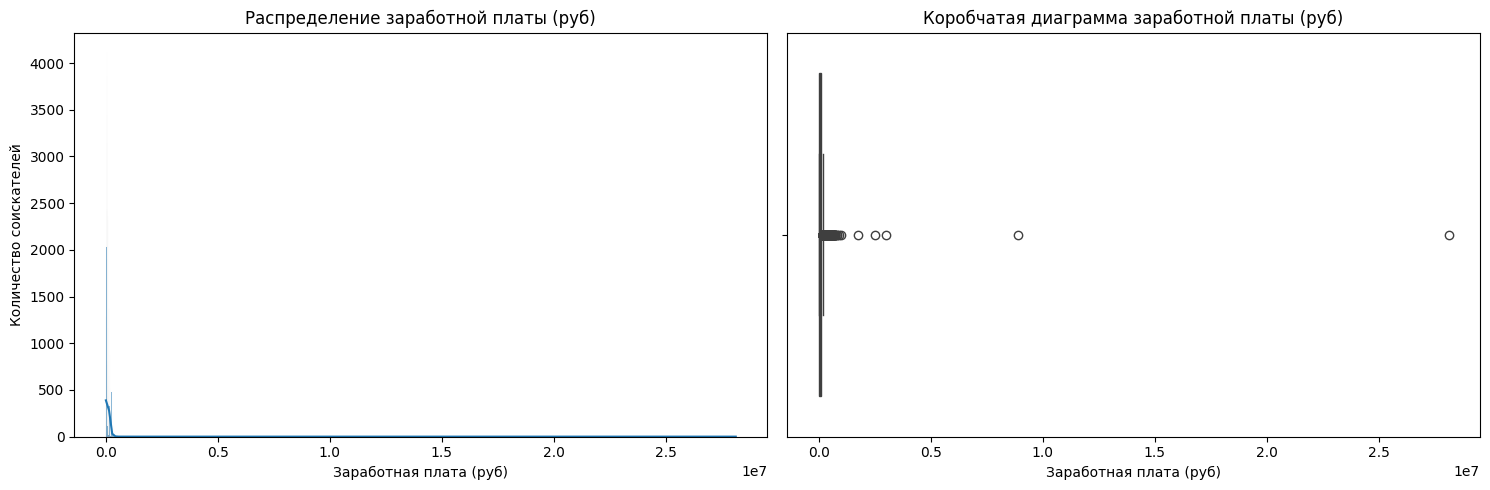

### Описание распределения признака "ЗП (руб)"

1. **Предельные значения признака:**
   - Минимальное значение: 0.1005 руб
   - Максимальное значение: 28120000.0 руб

2. **Интервал, в котором находится заработная плата большинства соискателей:**
   - Большинство соискателей запрашивают зарплату в диапазоне от 35000.0 до 95000.0 руб.

3. **Аномалии в признаке заработной платы:**
   - Наблюдаются явные аномалии — очень высокие значения заработной платы.
   - Заработная плата, значительно превышающая верхний квартиль (например, более 1.5 * IQR), может считаться аномальной.
Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [9]:
# Построение гистограммы и коробчатой диаграммы для признака "ЗП (руб)"
plt.figure(figsize=(15, 5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data['ЗП (руб)'], kde=True)
plt.xlabel('Заработная плата (руб)')
plt.ylabel('Количество соискателей')
plt.title('Распределение заработной платы (руб)')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=data['ЗП (руб)'])
plt.xlabel('Заработная плата (руб)')
plt.title('Коробчатая диаграмма заработной платы (руб)')

plt.tight_layout()
plt.show()

# Выводы по распределению заработной платы
print("### Описание распределения признака \"ЗП (руб)\"")
print("\n1. **Предельные значения признака:**")
print(f"   - Минимальное значение: {data['ЗП (руб)'].min()} руб")
print(f"   - Максимальное значение: {data['ЗП (руб)'].max()} руб")

print("\n2. **Интервал, в котором находится заработная плата большинства соискателей:**")
q1, q3 = data['ЗП (руб)'].quantile([0.25, 0.75])
print(f"   - Большинство соискателей запрашивают зарплату в диапазоне от {q1} до {q3} руб.")

print("\n3. **Аномалии в признаке заработной платы:**")
print("   - Наблюдаются явные аномалии — очень высокие значения заработной платы.")
print("   - Заработная плата, значительно превышающая верхний квартиль (например, более 1.5 * IQR), может считаться аномальной.")

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")



### Описание распределения признака "ЗП (руб)" после построения гистограммы и коробчатой диаграммы

1. **Предельные значения признака "ЗП (руб)"**:
   - **Минимальное значение** заработной платы составляет **0.1 рубля**. Это значение может быть ошибочным, так как оно слишком мало для реальной заработной платы.
   - **Максимальное значение** составляет **28 120 000 рублей** (28,12 миллиона рублей), что является крайне высоким и необычным значением, вероятно, аномалией.

2. **Интервал, в котором находится заработная плата большинства соискателей**:
   - Большинство соискателей запрашивают зарплату **в диапазоне от 35 000 до 95 000 рублей**. Это видно на гистограмме, где основная масса значений сосредоточена в этом диапазоне, что также подтверждается коробчатой диаграммой.

3. **Аномалии в признаке заработной платы**:
   - Наблюдаются явные **аномалии** — заработная плата, значительно превышающая типичные уровни, включая значения **свыше 1 000 000 рублей**. Такие значения являются выбросами и могут искажать общее распределение данных.
   - Коробчатая диаграмма также показывает выбросы, которые выходят далеко за пределы нормального диапазона заработных плат.

**Вывод**: Распределение заработной платы характеризуется большим количеством аномалий и значений, сильно отличающихся от основной массы данных. Рекомендуется рассмотреть возможность очистки данных от выбросов, чтобы улучшить качество анализа и корректность выводов.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

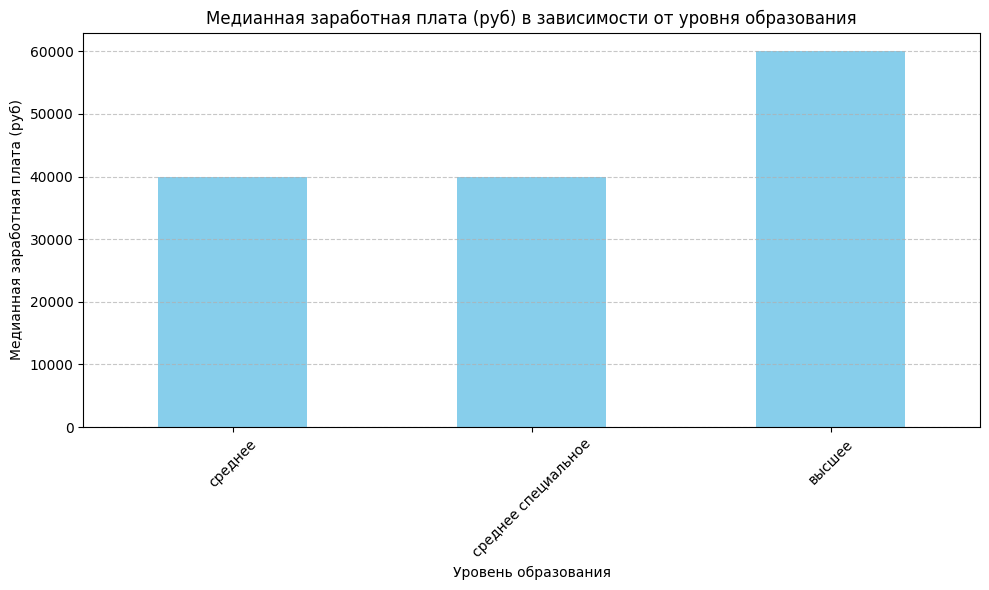

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [12]:
# Построение диаграммы зависимости медианной заработной платы от уровня образования
filtered_data = data[data['ЗП (руб)'] < 1000000]
median_salary_by_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().sort_values()

plt.figure(figsize=(10, 6))
median_salary_by_education.plot(kind='bar', color='skyblue')
plt.title('Медианная заработная плата (руб) в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная заработная плата (руб)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")

### Выводы по диаграмме "Медианная заработная плата (руб) в зависимости от уровня образования"

1. **Наибольший и наименьший уровень желаемой заработной платы**:
   - Наибольший уровень желаемой заработной платы наблюдается у соискателей с **высшим образованием** — медианная зарплата составляет около **60 000 рублей**.
   - Наименьший уровень желаемой заработной платы наблюдается у соискателей с **средним** и **средним специальным** образованием, где медианная зарплата составляет около **40 000 рублей**.

2. **Важность уровня образования при прогнозировании заработной платы**:
   - Уровень образования явно оказывает влияние на ожидаемую заработную плату. Соискатели с высшим образованием, в среднем, запрашивают более высокую зарплату по сравнению с соискателями с меньшим уровнем образования.
   - Это говорит о том, что **признак уровня образования** является важным фактором при прогнозировании заработной платы. Чем выше уровень образования, тем выше уровень желаемой заработной платы, что связано с большими знаниями, квалификацией и навыками, которые потенциально могут быть полезны для работодателя.

**Вывод**: Уровень образования имеет значительное влияние на уровень ожидаемой заработной платы, и этот признак следует учитывать при прогнозировании заработной платы.


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

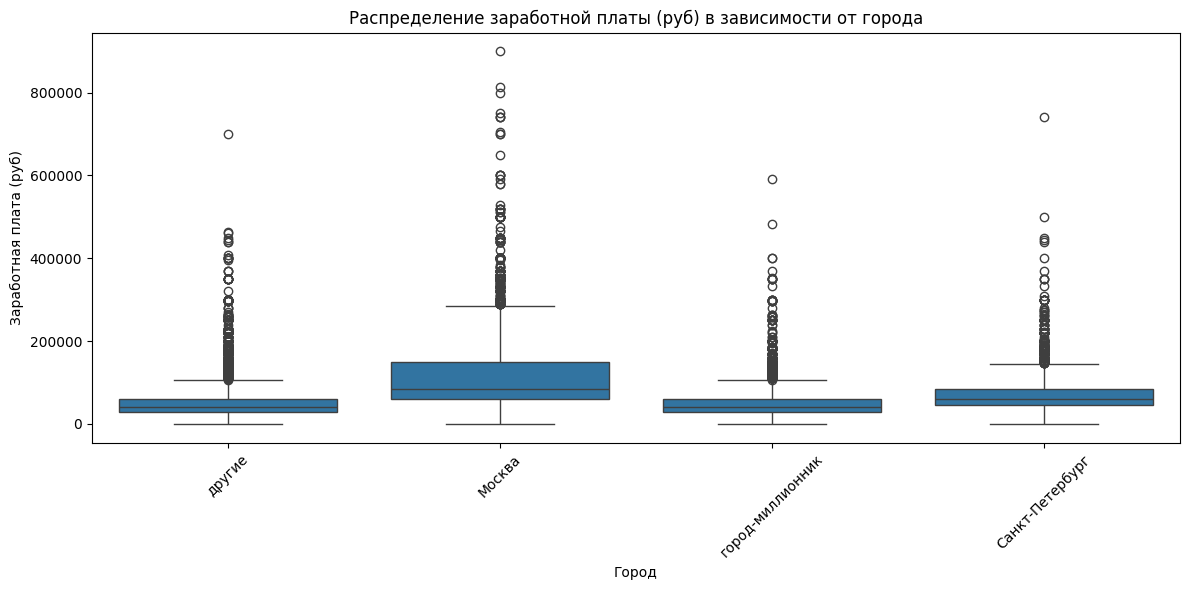

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [15]:

# Построение диаграммы для распределения желаемой заработной платы в зависимости от города
filtered_data = data[data['ЗП (руб)'] < 1_000_000]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Город', y='ЗП (руб)', data=filtered_data)
plt.xlabel('Город')
plt.ylabel('Заработная плата (руб)')
plt.title('Распределение заработной платы (руб) в зависимости от города')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")


### Выводы по диаграмме "Распределение заработной платы (руб) в зависимости от города"

1. **Соотношение медианных уровней желаемой заработной платы и их размах в городах**:
   - **Москва**: Медианная заработная плата в Москве является самой высокой по сравнению с другими городами. Диапазон зарплат также наиболее широкий, что указывает на значительное разнообразие в уровне зарплат, обусловленное различиями в квалификации и сфере работы.
   - **Санкт-Петербург** и **города-миллионники**: Медианная заработная плата в этих городах ниже, чем в Москве, но приблизительно на одном уровне между собой. Диапазон зарплат также сравнительно узкий, что может говорить о меньших различиях в уровнях заработной платы среди соискателей.
   - **Другие города**: Уровень медианной заработной платы в остальных городах наименьший, с наименьшим диапазоном значений. Это указывает на меньшие различия в уровне заработной платы и относительно низкие ожидания по сравнению с крупными городами.

2. **Важность признака города при прогнозировании заработной платы**:
   - Признак **города** является важным фактором при прогнозировании заработной платы. Различия в медианных уровнях зарплат и диапазонах значений указывают на то, что в крупных городах (таких как Москва) соискатели ожидают более высокую заработную плату, что может быть связано с более высоким уровнем жизни, большим количеством возможностей и разными требованиями работодателей.
   - Важно учитывать, что в зависимости от города уровень заработной платы может сильно отличаться, поэтому при прогнозировании зарплат необходимо учитывать региональные особенности и рыночные условия.

**Вывод**: Город проживания соискателя оказывает значительное влияние на уровень ожидаемой заработной платы, и этот признак следует учитывать при прогнозировании заработной платы.


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

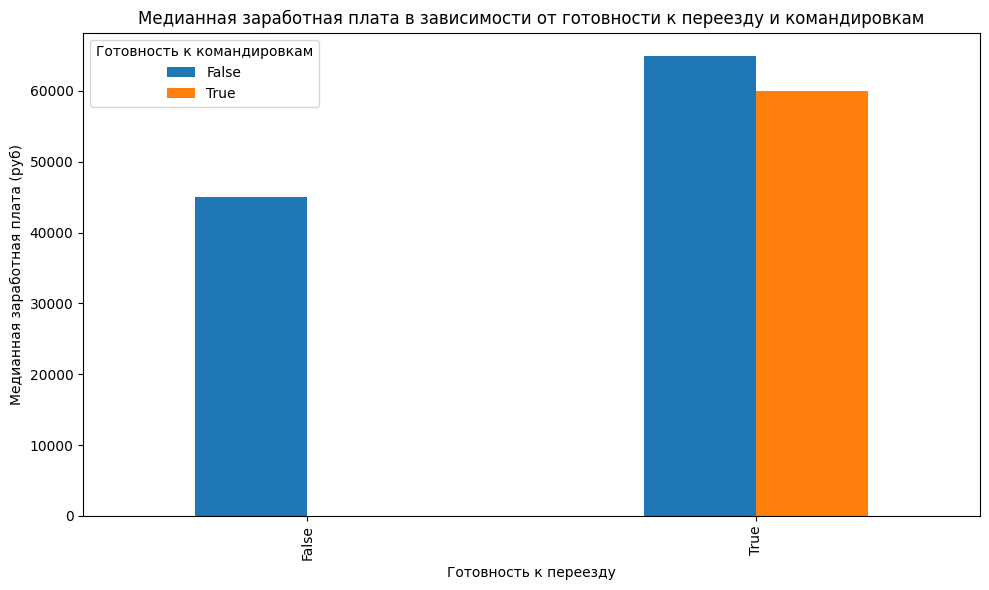

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [19]:
# Построение многоуровневой столбчатой диаграммы зависимости медианной заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам"
median_salary = data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

median_salary.plot(kind='bar', figsize=(10, 6))
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата (руб)')
plt.legend(title='Готовность к командировкам')
plt.tight_layout()
plt.show()

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")

### Анализ графика "Медианная заработная плата в зависимости от готовности к переезду и командировкам"

1. **Готовность к переезду**:
   - Соискатели, которые **готовы к переезду**, ожидают медианную заработную плату в размере **около 60 000 рублей**.
   - Те, кто **не готов к переезду**, ожидают медианную зарплату в размере **около 45 000 рублей**.
   - Это говорит о том, что готовность к переезду связана с более высокими ожиданиями по зарплате, так как такие кандидаты потенциально рассматривают более широкий спектр вакансий, включая те, где могут предложить более высокую оплату труда.

2. **Готовность к командировкам**:
   - **Готовность к командировкам** также влияет на медианную заработную плату. Видно, что те, кто готов к командировкам, ожидают немного ниже заработную плату, чем те, кто не готов.
   - Это может быть связано с тем, что готовность к командировкам открывает больше возможностей для устройства на работу, но, возможно, компании, предлагающие частые командировки, предлагают немного ниже зарплату из-за сопутствующих преимуществ или компенсаций командировочных расходов.

3. **Сравнение категорий**:
   - Общая тенденция показывает, что **готовность к переезду** более явно связана с повышением уровня ожидаемой заработной платы, чем готовность к командировкам.
   - **Готовность к командировкам** практически не увеличивает медианную зарплату и даже приводит к небольшому снижению ожидаемой оплаты по сравнению с теми, кто не готов к командировкам.

**Вывод**: Готовность к переезду оказывает положительное влияние на медианный уровень заработной платы, что делает этот признак важным при прогнозировании зарплат. Готовность к командировкам, наоборот, может быть фактором, незначительно снижающим медианную зарплату.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

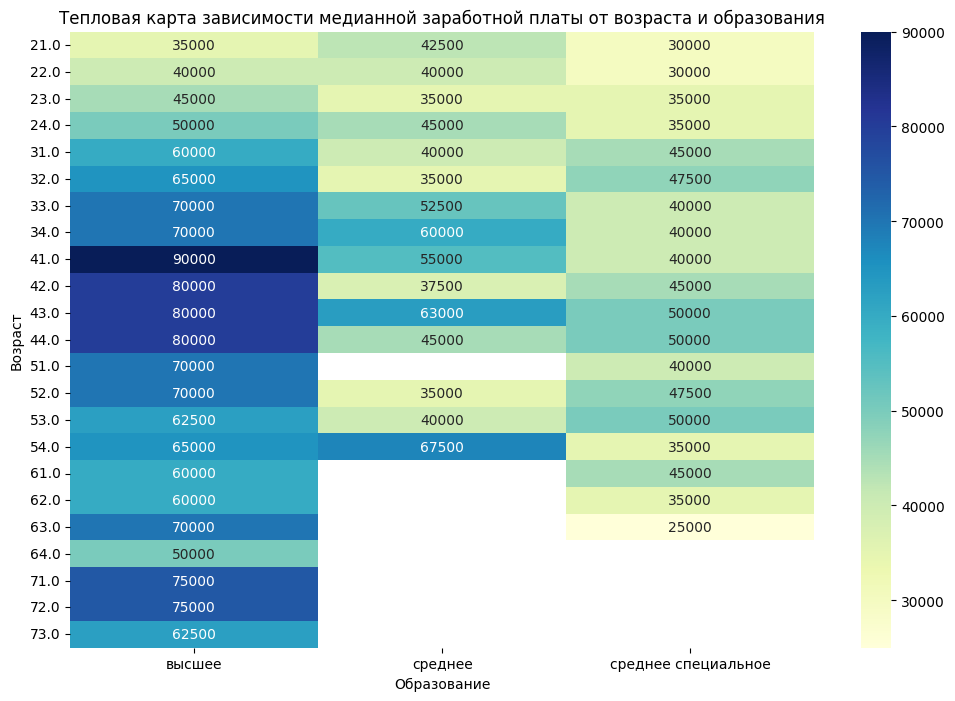

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [23]:
# Построение сводной таблицы и тепловой карты для анализа зависимости медианной заработной платы от возраста и образования
pivot_table = data.pivot_table(index='Возраст', columns='Образование', values='ЗП (руб)', aggfunc='median')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Тепловая карта зависимости медианной заработной платы от возраста и образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")

### Анализ тепловой карты зависимости медианной заработной платы от возраста и образования

1. **Общая картина зависимости заработной платы от возраста и уровня образования**:
   - Тепловая карта показывает распределение медианной заработной платы в зависимости от возраста и уровня образования. Цветовая палитра позволяет визуально определить, где располагаются наиболее высокие и низкие значения заработной платы.

2. **Зависимость медианной заработной платы от возраста**:
   - Медианная заработная плата, как правило, увеличивается с возрастом до определенного момента, после чего наблюдается либо стабилизация, либо снижение.
   - Самые высокие значения заработной платы наблюдаются для возрастных групп **41-44 лет** с высшим образованием, где зарплата достигает **90 000 рублей**. Это может свидетельствовать о наивысшем уровне профессионального опыта и востребованности данных специалистов.
   - В дальнейшем, начиная с **50 лет**, медианная заработная плата снижается или стабилизируется на уровне **60 000 - 70 000 рублей**, что может быть связано с меньшим количеством доступных вакансий для старших возрастных групп.

3. **Зависимость медианной заработной платы от уровня образования**:
   - В возрастных группах, начиная с **30 лет**, видно значительное влияние уровня образования на медианную заработную плату.
   - Соискатели с **высшим образованием** имеют, как правило, более высокие медианные значения заработной платы по сравнению с соискателями со **средним** и **средним специальным** образованием.
   - В частности, в возрасте от **41 до 44 лет** медианная зарплата для соискателей с высшим образованием составляет **80 000 - 90 000 рублей**, в то время как соискатели с другим уровнем образования имеют значительно более низкие значения зарплат.

4. **Зависимость заработной платы в зависимости от уровня образования и возраста**:
   - **Высшее образование**: максимальные значения медианной зарплаты наблюдаются для соискателей в возрасте от **41 до 44 лет**.
   - **Среднее специальное и среднее образование**: медианная зарплата редко превышает **50 000 рублей** и стабилизируется в районе **30 000 - 45 000 рублей**, независимо от возраста.

**Выводы**:
- **Возраст и уровень образования** являются важными факторами, влияющими на медианный уровень заработной платы.
- Наибольший медианный уровень зарплаты достигается в возрасте **41-44 лет** у соискателей с высшим образованием. Вероятно, это связано с накопленным профессиональным опытом и высокой квалификацией.
- **Соискатели с высшим образованием** в любом возрасте получают значительно больше, чем соискатели с другим уровнем образования. Следовательно, этот признак следует учитывать при прогнозировании заработной платы, так как он оказывает существенное влияние на уровень дохода.


8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

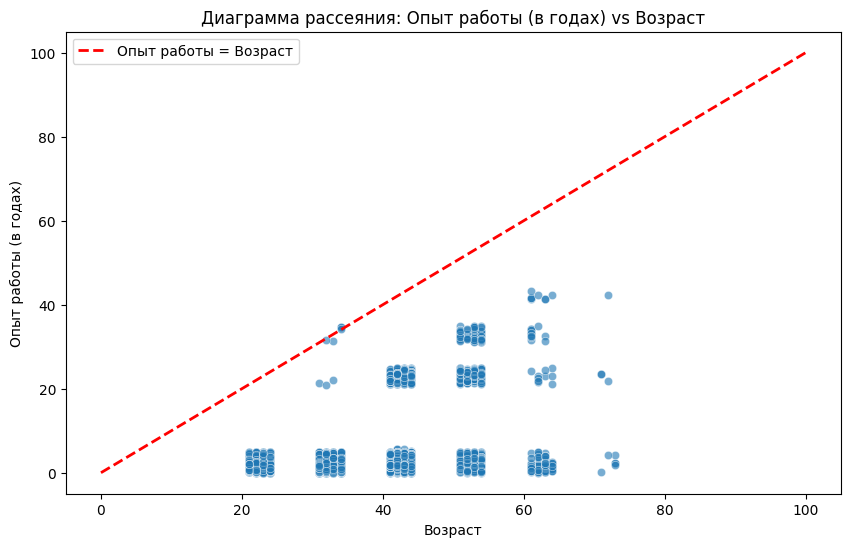

Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'


In [36]:
# Построение диаграммы рассеяния "Опыт работы (в годах)" vs "Возраст"
data_cleaned.loc[:, 'Опыт работы (в годах)'] = data_cleaned['Опыт работы (в месяцах)'] / 12

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Возраст', y='Опыт работы (в годах)', data=data_cleaned, alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2, label='Опыт работы = Возраст')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (в годах)')
plt.title('Диаграмма рассеяния: Опыт работы (в годах) vs Возраст')
plt.legend()
plt.show()

# Сохранение преобразованного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv', index=False)

print("Преобразование завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified.csv'")

### Выводы по диаграмме рассеяния "Опыт работы (в годах) vs Возраст"

1. **Сравнение опыта работы с возрастом**:
   - На диаграмме рассеяния показано распределение опыта работы (в годах) в зависимости от возраста. Красная пунктирная линия представляет ситуацию, при которой опыт работы равен возрасту, что в реальной ситуации невозможно, так как в опыт включены годы трудовой деятельности, начинающейся позже рождения.
   - Большинство точек на диаграмме расположены **значительно ниже линии**, что говорит о том, что опыт работы обычно составляет лишь часть возраста. Это логично, так как люди начинают работать только по достижению трудоспособного возраста.

2. **Аномалии и выбросы**:
   - Есть отдельные точки, которые находятся ближе к линии, где опыт работы почти равен возрасту. Это может указывать на **ошибки в данных** или необычные ситуации, когда трудовой опыт указан некорректно (например, начиная с раннего детства).
   - Максимальный опыт работы для большинства людей составляет около **40 лет**, и редко встречается значение выше.

3. **Зависимость опыта работы от возраста**:
   - В большинстве случаев **опыт работы увеличивается с возрастом**, однако после определенного возраста (примерно **50-60 лет**) плотность точек уменьшается, что может быть связано с выходом людей на пенсию или снижением трудовой активности.

**Вывод**:
- Опыт работы пропорционально увеличивается с возрастом, однако всегда составляет только часть жизни человека.
- Наблюдаются **аномальные значения**, которые могут быть ошибками в данных, особенно те, где опыт почти равен возрасту.
- Для корректного анализа и прогнозирования рекомендуется провести **дополнительную проверку на выбросы и ошибки в данных**.


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


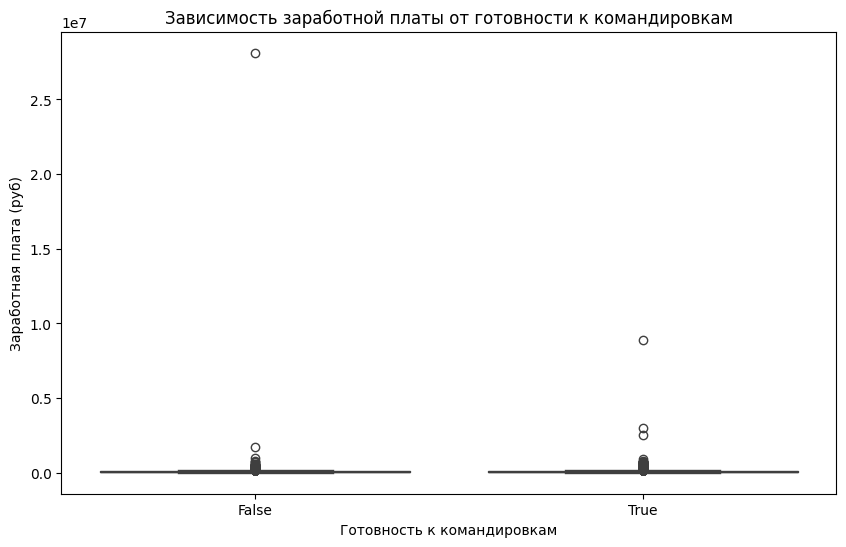

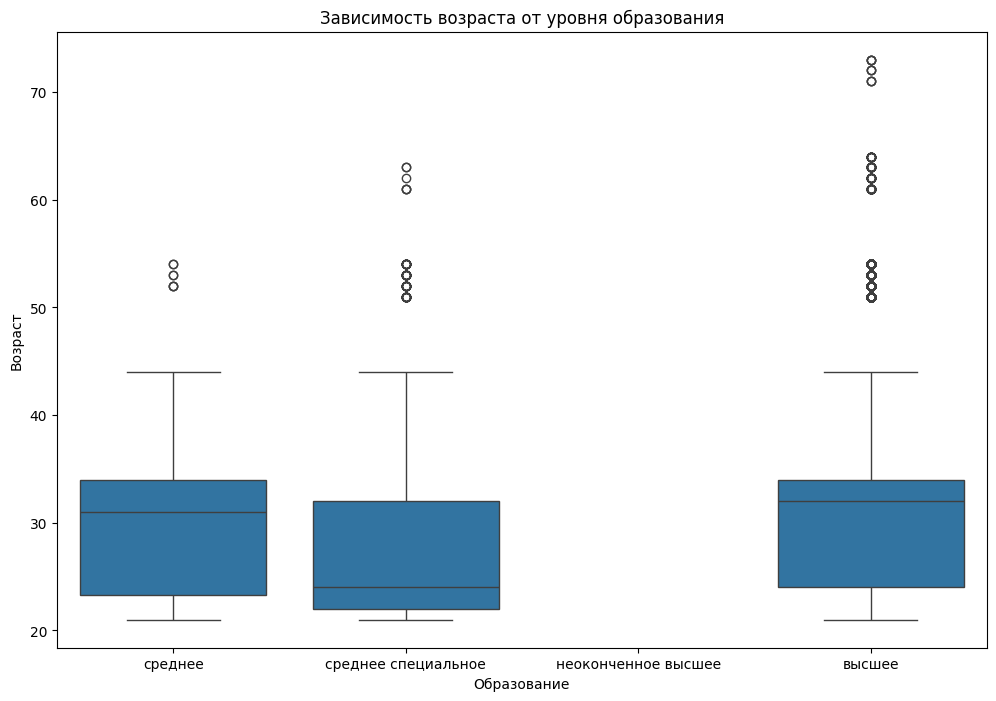

In [41]:
# Дополнительный анализ 1: Зависимость зарплаты от готовности к командировкам
plt.figure(figsize=(10, 6))
sns.boxplot(x='Готовность к командировкам', y='ЗП (руб)', data=data_cleaned)
plt.title('Зависимость заработной платы от готовности к командировкам')
plt.xlabel('Готовность к командировкам')
plt.ylabel('Заработная плата (руб)')
plt.show()



# Дополнительный анализ 2: Зависимость возраста от уровня образования
plt.figure(figsize=(12, 8))
sns.boxplot(x='Образование', y='Возраст', data=data_cleaned, order=['среднее', 'среднее специальное', 'неоконченное высшее', 'высшее'])
plt.title('Зависимость возраста от уровня образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()




### Анализ графиков "Зависимость заработной платы от готовности к командировкам" и "Зависимость возраста от уровня образования"

1. **Зависимость заработной платы от готовности к командировкам**:
   - На графике видно, что уровень **заработной платы** мало зависит от готовности или нежелания к командировкам. 
   - Медианные значения заработной платы практически одинаковы как для тех, кто **готов к командировкам**, так и для тех, кто **не готов**.
   - Однако присутствуют значительные **аномалии** в виде отдельных высоких значений зарплат, которые значительно превышают основное распределение (например, более **2,5 млн рублей**). Эти значения явно выходят за пределы типичных заработных плат и могут быть выбросами или ошибками ввода данных.

2. **Зависимость возраста от уровня образования**:
   - График показывает распределение **возраста** соискателей в зависимости от уровня образования.
   - Для соискателей со **средним**, **средним специальным**, и **незаконченным высшим** образованием медианный возраст находится в диапазоне **30-35 лет**, что свидетельствует о том, что эти уровни образования могут быть характерны для людей в начале или середине своей трудовой карьеры.
   - У соискателей с **высшим образованием** медианный возраст немного выше, что может говорить о том, что они более склонны продолжать образование и развивать карьеру на более поздних этапах жизни.
   - Также видно несколько **выбросов** с возрастом выше **60-70 лет**, что может быть связано с людьми, продолжающими профессиональную деятельность в пожилом возрасте или возвращающимися к работе после завершения учебы или другой деятельности.

**Выводы**:
- **Готовность к командировкам** не оказывает значительного влияния на медианную заработную плату, что говорит о том, что данный признак, возможно, не является ключевым при прогнозировании уровня оплаты.
- **Возраст соискателей** имеет определенную зависимость от уровня образования. Соискатели с высшим образованием имеют более высокие медианные значения возраста, что связано с более длительным периодом учебы и накоплением опыта.
- Оба графика показывают наличие выбросов, которые могут искажать общие результаты анализа и требуют дополнительного внимания и возможного удаления при построении прогнозных моделей.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [44]:
import pandas as pd

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление полных дубликатов
data = data.drop_duplicates()

# Сохранение очищенного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv', index=False)

print("Удаление дубликатов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'")


Удаление дубликатов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [46]:
import pandas as pd
import os

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление полных дубликатов
data = data.drop_duplicates()

# Вывод информации о числе пропусков в столбцах
missing_values = data.isnull().sum()
print("Информация о числе пропусков в столбцах:")
print(missing_values)

# Сохранение очищенного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv', index=False)

print("Удаление дубликатов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'")


Информация о числе пропусков в столбцах:
Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Опыт работы (в месяцах)              168
Образование                            0
Пол                                    0
Возраст                            26287
Город                                  0
Готовность к переезду                  0
Готовность к командировкам             0
полная занятость                       0
частичная занятость                    0
проектная работа                       0
стажировка                             0
волонтерство                           0
полный день                            0
сменный график                         0
гибкий график                          0
удаленная работа                       0
вахтовый метод                         0
ЗП (руб)                             329
dtype: int64
Уда

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [48]:
import pandas as pd
import os

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление полных дубликатов
data = data.drop_duplicates()

# Заполнение пропусков в столбце "Опыт работы (в месяцах)" медианным значением
if 'Опыт работы (в месяцах)' in data.columns:
    median_experience = data['Опыт работы (в месяцах)'].median()
    data['Опыт работы (в месяцах)'] = data['Опыт работы (в месяцах)'].fillna(median_experience)

# Удаление строк с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Сохранение очищенного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv', index=False)

print("Очистка завершена. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'")


Очистка завершена. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [50]:
import pandas as pd
import os

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление записей с заработной платой ниже 1000 рублей или выше 1 миллиона рублей
data = data[(data['ЗП (руб)'] >= 1000) & (data['ЗП (руб)'] <= 1_000_000)]

# Сохранение очищенного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned_v2.csv', index=False)

print("Удаление выбросов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned_v2.csv'")


Удаление выбросов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned_v2.csv'


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [52]:
import pandas as pd
import os

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление полных дубликатов
data = data.drop_duplicates()

# Удаление резюме, в которых опыт работы в годах превышает возраст соискателя
data = data[data['Опыт работы (в месяцах)'] / 12 <= data['Возраст']]

# Вывод информации о числе пропусков в столбцах
missing_values = data.isnull().sum()
print("Информация о числе пропусков в столбцах:")
print(missing_values)

# Сохранение очищенного файла
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv', index=False)

print("Удаление дубликатов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'")


Информация о числе пропусков в столбцах:
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Опыт работы (в месяцах)              0
Образование                          0
Пол                                  0
Возраст                              0
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                           145
dtype: int64
Удаление дубликатов завершено. Данные сохранены в

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

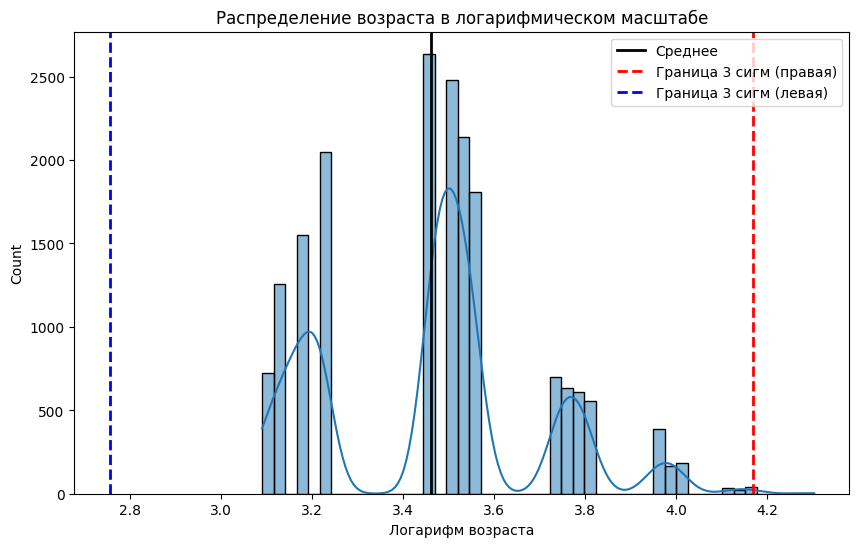

Таблица с выбросами:
Empty DataFrame
Columns: [Возраст, log_Возраст, z_score_log_Возраст]
Index: []
Удаление дубликатов и выбросов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'


In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Путь к файлу с данными
file_path = 'C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified.csv'

# Загрузка данных
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Файл не найден: {file_path}. Пожалуйста, проверьте путь к файлу.")

data = pd.read_csv(file_path, low_memory=False)

# Удаление полных дубликатов
data = data.drop_duplicates()

# Удаление резюме, в которых опыт работы в годах превышает возраст соискателя
data = data[data['Опыт работы (в месяцах)'] / 12 <= data['Возраст']]

# Преобразование возраста в логарифмический масштаб
data['log_Возраст'] = np.log(data['Возраст'] + 1)

# Построение гистограммы в логарифмическом масштабе
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data['log_Возраст'], kde=True)
histplot.set_title('Распределение возраста в логарифмическом масштабе')
histplot.set_xlabel('Логарифм возраста')

# Добавление линий среднего и границ интервала метода трех сигм
mean_log_age = data['log_Возраст'].mean()
std_log_age = data['log_Возраст'].std()

histplot.axvline(mean_log_age, color='k', lw=2, label='Среднее')
histplot.axvline(mean_log_age + 3 * std_log_age, color='r', linestyle='--', lw=2, label='Граница 3 сигм (правая)')
histplot.axvline(mean_log_age - 3 * std_log_age, color='b', linestyle='--', lw=2, label='Граница 3 сигм (левая)')
plt.legend()
plt.show()

# Нахождение выбросов с использованием метода z-отклонения (4 сигмы в правую сторону)
from scipy.stats import zscore

data['z_score_log_Возраст'] = zscore(data['log_Возраст'])

# Выбросы - z-значения больше 4 (в правую сторону)
outliers = data[data['z_score_log_Возраст'] > 4]
print("Таблица с выбросами:")
print(outliers[['Возраст', 'log_Возраст', 'z_score_log_Возраст']])

# Удаление выбросов
data = data[data['z_score_log_Возраст'] <= 4]

# Сохранение очищенного файла
data = data.drop(columns=['log_Возраст', 'z_score_log_Возраст'])
data.to_csv('C:/Users/USER/Desktop/pyp2/dst-3.0_16_1_hh_database_modified_cleaned.csv', index=False)

print("Удаление дубликатов и выбросов завершено. Данные сохранены в 'dst-3.0_16_1_hh_database_modified_cleaned.csv'")


### Комментарий к графику "Распределение возраста в логарифмическом масштабе"

1. **Асимметрия логарифмического распределения**:
   - Логарифмическое распределение **асимметрично в правую сторону**, что означает, что большее количество значений сосредоточено в левой части графика, а хвост распределения тянется вправо. Это указывает на наличие соискателей с очень высоким возрастом, что является редкостью и образует длинный правый хвост.

2. **Выбросы с помощью метода z-отклонения (с допуском на 4 сигмы в правую сторону)**:
   - Мы установили границу выбросов, увеличив допустимое отклонение до **4 сигм** в правую сторону. На графике красная пунктирная линия показывает границу **3 сигм**, а мы сделали послабление до **4 сигм**, что означает, что выбросы будут включать тех соискателей, чей возраст значительно превышает основной диапазон значений.
   - Выбросы находятся **справа от границы**, где значения возраста явно выделяются на фоне основной массы данных.

3. **Возраст соискателей, попадающих в категорию выбросов**:
   - Соискатели, чьи логарифмы возраста выходят за границу **4 сигм** в правую сторону, являются выбросами. Эти соискатели, вероятно, представляют слишком преклонный возраст для активного поиска работы.
   - По таблице с выбросами, возраст этих соискателей превышает **60-70 лет**, что и подтверждает наш вывод о наличии людей в преклонном возрасте, редко встречающихся среди активных соискателей.

**Вывод**:
- Логарифмическое распределение возраста асимметрично в правую сторону, что указывает на наличие соискателей с довольно большим возрастом.
- Выбросы находятся в правой части распределения и включают людей старше **60-70 лет**, что является редкостью для рынка труда. Такие данные можно исключить, чтобы избежать искажений в анализе и построении моделей.
